In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/credit-card-customer-churn-prediction/Churn_Modelling.csv


In [2]:
df=pd.read_csv('/kaggle/input/credit-card-customer-churn-prediction/Churn_Modelling.csv')

In [3]:
print(df.head(3))
print(df.shape)

   RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0  
2        113931.57       1  
(10000, 14)


In [4]:
df=pd.get_dummies(df,columns=['Geography','Gender'],drop_first=True,dtype=int)

In [5]:
df.drop(columns=['RowNumber','CustomerId','Surname'],inplace=True)

In [6]:
df

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,1,0,0,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,1,0,1


In [7]:
from sklearn.preprocessing import StandardScaler

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X_train,X_test,Y_train,Y_test=train_test_split(df.drop(['Exited'],axis=1),df['Exited'],test_size=0.2,random_state=1)

In [10]:
Y_train

2694    0
5140    0
2568    1
3671    0
7427    0
       ..
2895    0
7813    1
905     1
5192    0
235     1
Name: Exited, Length: 8000, dtype: int64

In [11]:
sc=StandardScaler()

In [12]:
X_train_scaled=sc.fit_transform(X_train)

In [13]:
X_test_scaled=sc.transform(X_test)

In [14]:
import tensorflow 
from tensorflow import keras 
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

2025-07-21 10:02:18.589393: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1753092138.812683      13 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1753092138.876566      13 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [15]:
model=Sequential()

In [16]:
# in Sequential you will add the layer so here we wouldb e having 1 input layer,1 hidden and 1 output layer

# input layer with 3 perceptron or node
# Dense(number of nodes units, activation='...', input_dim=...)
# input_dim	Only used in the first layer – how many input features you have
# ok so what i am creating here is simple feed forward nerual network and sequential is use to create that and now in Dense we would be telling about the information of the layer through model.add and in dense the parameters are as follows 1 number of input node ,actiavtion function and in_put _dim and in the second one the units and what is the use of input_dim
model.add(Dense(5,activation='sigmoid',input_dim=11))
model.add(Dense(4,activation='sigmoid'))
model.add(Dense(1,activation='sigmoid'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-07-21 10:02:32.800971: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


In [17]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 5)                   │              60 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 4)                   │              24 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │               5 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 89 (356.00 B)

 Trainable params: 89 (356.00 B)

 Non-trainable params: 0 (0.00 B)

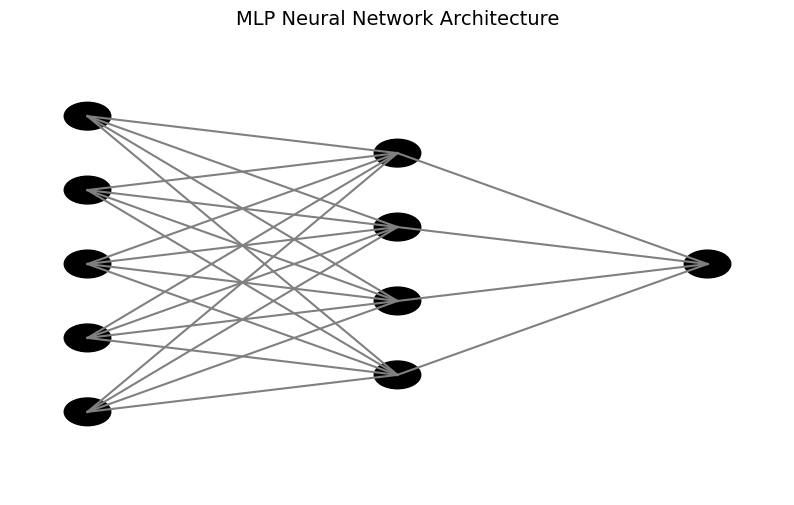

In [18]:
import matplotlib.pyplot as plt

def draw_neural_net(ax, left, right, bottom, top, layer_sizes):
    n_layers = len(layer_sizes)
    v_spacing = (top - bottom) / float(max(layer_sizes))
    h_spacing = (right - left) / float(len(layer_sizes) - 1)

    # Draw nodes
    for i, n_nodes in enumerate(layer_sizes):
        layer_top = v_spacing * (n_nodes - 1) / 2. + (top + bottom) / 2.
        for j in range(n_nodes):
            circle = plt.Circle((left + i * h_spacing, layer_top - j * v_spacing),
                                0.03, color='black', fill=True)
            ax.add_artist(circle)

    # Draw connections
    for i, (layer_size_a, layer_size_b) in enumerate(zip(layer_sizes[:-1], layer_sizes[1:])):
        layer_top_a = v_spacing * (layer_size_a - 1) / 2. + (top + bottom) / 2.
        layer_top_b = v_spacing * (layer_size_b - 1) / 2. + (top + bottom) / 2.
        for j in range(layer_size_a):
            for k in range(layer_size_b):
                line = plt.Line2D(
                    [left + i * h_spacing, left + (i + 1) * h_spacing],
                    [layer_top_a - j * v_spacing, layer_top_b - k * v_spacing],
                    c='gray'
                )
                ax.add_artist(line)

# Create figure
fig, ax = plt.subplots(figsize=(10, 6))
ax.axis('off')

# Your model: 11 inputs → 3 hidden → 1 output
draw_neural_net(ax, .1, .9, .1, .9, [5, 4, 1])
plt.title("MLP Neural Network Architecture", fontsize=14)
plt.show()


In [19]:
model.compile(loss='binary_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [20]:
history=model.fit(X_train_scaled,Y_train,epochs=100,validation_split=0.2)

Epoch 1/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.2305 - loss: 0.8234 - val_accuracy: 0.8031 - val_loss: 0.6369
Epoch 2/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7947 - loss: 0.6085 - val_accuracy: 0.7975 - val_loss: 0.5399
Epoch 3/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7871 - loss: 0.5355 - val_accuracy: 0.7975 - val_loss: 0.5020
Epoch 4/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8025 - loss: 0.4922 - val_accuracy: 0.7975 - val_loss: 0.4851
Epoch 5/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7937 - loss: 0.4839 - val_accuracy: 0.7975 - val_loss: 0.4745
Epoch 6/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7978 - loss: 0.4690 - val_accuracy: 0.7975 - val_loss: 0.4656
Epoch 7/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7974 - loss: 0.4599 - val_accuracy: 0.7975 - val_loss: 0.4576
Epoch 8/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7991 - loss: 0.4476 - val_accu

In [21]:
model.layers[0].get_weights()

[array([[-5.9021149e-02, -3.3471640e-02,  8.0063738e-02, -6.0760166e-02,
          3.7807977e-01],
        [ 3.3050191e-01,  2.6200254e+00, -3.0361669e+00,  5.5804825e-01,
         -3.7804282e-01],
        [-3.0579710e-02,  2.4601624e-03, -3.1618163e-01,  3.2086650e-01,
          2.7656054e-01],
        [ 1.4779799e-02,  1.9730680e-01,  4.9650946e-01, -3.9314398e-01,
         -5.7220322e-01],
        [ 5.3530023e-02, -3.2182530e-01, -1.4095747e-01,  6.1463472e-02,
         -3.6111438e-01],
        [-1.2856656e-01,  2.4053246e-01, -2.9175523e-01,  4.8262489e-01,
          4.7744396e-01],
        [ 2.1976647e+00,  1.4109365e+00, -1.0903293e+00,  1.4393687e+00,
          5.7512909e-01],
        [-3.3096081e-01,  1.5840104e-01,  2.9805624e-01,  4.9030018e-01,
         -8.5846424e-01],
        [-3.5230371e-01,  1.7074289e-02, -1.1698517e-01, -8.4785767e-02,
         -1.7622962e+00],
        [-1.6566712e-01,  2.7390009e-01, -2.0380765e-01,  1.9173600e-01,
          3.1198746e-01],
        [ 

In [22]:
Y_log=model.predict(X_test_scaled)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [23]:
y_pred=np.where(Y_log>0.5,1,0)

In [24]:
from sklearn.metrics import accuracy_score

In [25]:
accuracy_score(y_pred,Y_test)

0.8345